In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import igraph as ig
import torch
import plotly.express as px
from src import Simulation as sim
from src import Dir_Reg
from src import Align
from src import visualize_latent_space as vls
from src import ABC_Reg

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [37]:
T10 = pd.read_csv(r"real data\twitter_data_10.csv").drop(columns = "Unnamed: 0")
T11 = pd.read_csv(r"real data\twitter_data_11.csv").drop(columns = "Unnamed: 0")
T10 = torch.Tensor(T10.to_numpy())
T11 = torch.Tensor(T11.to_numpy())


T4 = pd.read_csv(r"real data\reddit_data_4.csv").drop(columns = "Unnamed: 0")
T5 = pd.read_csv(r"real data\reddit_data_5.csv").drop(columns = "Unnamed: 0")
T4 = torch.Tensor(T4.to_numpy())
T5 = torch.Tensor(T5.to_numpy())


<Axes: ylabel='Count'>

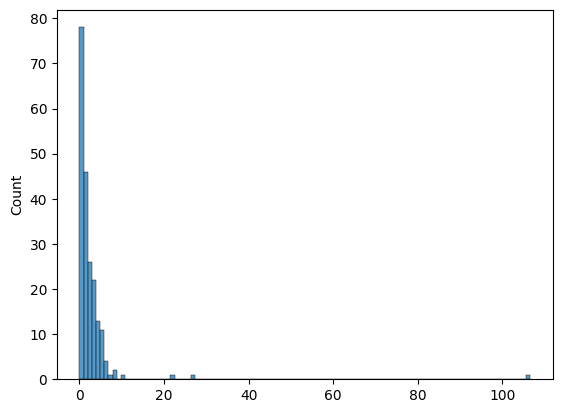

In [144]:
t = torch.svd(T10)[1].numpy()

sns.histplot(t)

In [137]:
temp = Align.Op_Riemannian_GD(Align.Oracle.ASE(T4, 4))

fig = px.scatter_3d(data_frame=(temp.data @ temp.align_mat), x = 0, y = 1, z = 2)
fig.update_traces(marker = dict(size = 3))

In [82]:
temp = Align.Op_Riemannian_GD(Align.Oracle.ASE(T4, 2))


tensor([[-3.1576e-02,  1.0187e+00],
        [-1.1126e-01,  1.0534e+00],
        [ 1.9185e-01,  9.4068e-01],
        [ 6.7668e-01,  5.2358e-01],
        [ 5.1818e-01,  6.7818e-01],
        [ 3.2269e-01,  2.5934e-01],
        [ 5.4959e-01,  5.0853e-01],
        [ 1.4654e-01,  9.3492e-02],
        [-1.3987e-01,  1.0659e+00],
        [-3.7824e-02,  1.0270e+00],
        [ 4.4145e-01,  7.2955e-01],
        [-1.8211e-01,  1.0878e+00],
        [ 1.0657e-01,  4.6445e-02],
        [-2.6924e-02,  1.0231e+00],
        [-1.8608e-01,  1.0919e+00],
        [ 2.4271e-01,  6.4607e-01],
        [ 3.3636e-01,  8.1653e-01],
        [ 1.9723e-01,  9.0324e-01],
        [ 3.8734e-01,  2.6100e-01],
        [ 6.0156e-01,  5.8388e-01],
        [ 6.1423e-01,  3.8987e-01],
        [-9.0489e-02,  1.0364e+00],
        [ 2.2734e-01,  9.1096e-01],
        [ 3.9186e-01,  8.3278e-01],
        [ 2.4818e-01,  9.1292e-01],
        [-9.2106e-02,  1.0521e+00],
        [-2.4767e-01,  1.1118e+00],
        [-1.6751e-01,  1.085

In [29]:
temp = pd.DataFrame((Align.Oracle.ASE(T10, 3) @ temp.align_mat).numpy())
